# Comparaison entrer les projections de SimGen et de certaines données exsistantes

## Effectuer une simulation avec Simgen


In [1]:
import sys
import warnings
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

Pour le moment, il faut changer les chemins pour les répertoires

In [2]:
sys.path.append('/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/simgen/')
path_data = '/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/Benchmark/'

In [3]:
from simgen import model

In [4]:
yr_debut=2017
yr_fin=2025

In [5]:
base = model(start_yr=yr_debut,stop_yr=yr_fin)
base.startpop('startpopchsld')
base.immig_assumptions(init='newimmpopchsld')
base.birth_assumptions(scenario='reference')
base.dead_assumptions(scenario='low')

In [6]:
base.simulate(rep=1)

In [7]:
base.stats.save('simpop_results.pkl')

## Extraction des résultats
Creation de "DataFrame" contenant la population totale par sexe

In [8]:
pop =base.stats.freq()
pop_m=base.stats.freq(sub='male==True')
pop_f=base.stats.freq(sub='male==False')

Creation de "DataFrame" contenant la populaton par groupe d'âge

In [9]:
pop_age=base.stats.freq('age')
bins=[-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,101]
bins_3=[-1,24,64,101]
pop_age_gr=base.stats.freq('age', bins=bins)
pop_age_gr.columns= pop_age_gr.columns.astype('str')
pop_age_gr3=base.stats.freq('age', bins=bins_3)
pop_age_gr3.columns= pop_age_gr3.columns.astype('str')

In [10]:
base.stats.freq('age', sub="age<=5")

age,0,1,2,3,4,5
2017,84380.686374,87169.700644,88564.207778,89711.625055,90498.911364,90313.844061
2018,83751.614402,84356.187068,86892.595276,89002.157545,90704.061967,91390.615479
2019,83467.105332,83459.457607,83991.514337,87328.850398,89361.529260,91602.930942
2020,84150.287324,82922.280884,83196.631811,84057.165144,88740.927818,90263.756765
2021,84554.512887,83793.718310,82624.871934,83252.545055,85298.799544,88599.354140
2022,84606.917031,84226.782216,83823.332706,82636.412012,84580.880445,85595.605434
2023,84762.291892,84359.528384,83928.851196,84035.818380,83744.156950,85302.752553
2024,84736.801471,84532.583784,84018.367446,84162.411312,85357.493442,84446.634955
2025,84277.188656,84632.702206,84103.256130,83978.153263,85610.960027,86045.311104
2026,84462.591384,84172.626387,84246.593850,84216.280702,85188.948665,86105.672502


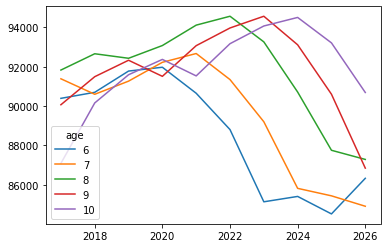

In [11]:
base.stats.freq('age', sub="age>=6 and age<=10").plot()

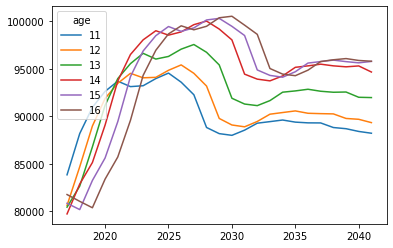

In [11]:
base.stats.freq('age', sub="age>=11 and age<=16").plot()

On charge ici les données provenant des derninères projections de l'ISQ. 

Il s'agit de projections de population basées sur le scénario moyen de l'ISQ à partir des données corrigées du recensement de 2016. Pour plus d'information concernant la méthodologie utilisée pour le calcul des projections de population, veuillez-vous référer au rapport « Perspectives démographiques du Québec et des régions, 2016-2066, édition 2019 » produit par l'ISQ à l'adresse suivante :

https://www.stat.gouv.qc.ca/statistiques/population-demographie/perspectives/perspectives-2016-2066.pdf

Pour la population de 1996-2018, il s'agit d'estimations de population constituant une série historique de populations comparables ayant servi à la construction des projections de population basées sur le recensement de 2016.

In [12]:
pop_isq = pd.read_csv(path_data+'isq_pop_age_1996_2041.csv', sep=';')
pop_isq = pop_isq.set_index('year')

Population totale par âge sexe

In [13]:
pop_isq_age = pop_isq.drop(['total'],axis=1)
pop_isq_age_tot=pop_isq_age.loc[pop_isq['sex']=='all']
pop_isq_age_tot_m=pop_isq_age.loc[pop_isq['sex']=='male']
pop_isq_age_tot_f=pop_isq_age.loc[pop_isq['sex']=='female']
pop_isq_age_tot = pop_isq_age_tot.drop(['sex'],axis=1)
pop_isq_age_tot_m = pop_isq_age_tot_m.drop(['sex'],axis=1)
pop_isq_age_tot_f = pop_isq_age_tot_f.drop(['sex'],axis=1)

Population par groupe d'âge

In [14]:
pop_isq_age_tot_trans = pop_isq_age_tot.T
pop_isq_age_tot_trans
pop_isq_age_tot_trans['age']= range(0,91)
bins=list(range(0,96,5))
bins_3=[0,25,65,91]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr_tot.columns= pop_isq_agegr_tot.columns.astype('str')
pop_isq_agegr_tot = pop_isq_agegr_tot[pop_isq_agegr_tot.index>=2017]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins_3, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr3_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr3_tot.columns= pop_isq_agegr3_tot.columns.astype('str')
pop_isq_agegr3_tot = pop_isq_agegr3_tot[pop_isq_agegr3_tot.index>=2017]

Population totale par sexe

In [15]:
pop_isq_total=pop_isq.loc[pop_isq['sex']=='all']
pop_isq_total =pop_isq_total['total']
pop_isq_total_m = pop_isq.loc[pop_isq['sex']=='male']
pop_isq_total_m =pop_isq_total_m['total']
pop_isq_total_f = pop_isq.loc[pop_isq['sex']=='female']
pop_isq_total_f =pop_isq_total_f['total']

## Figue comparaison population

### Population totale 

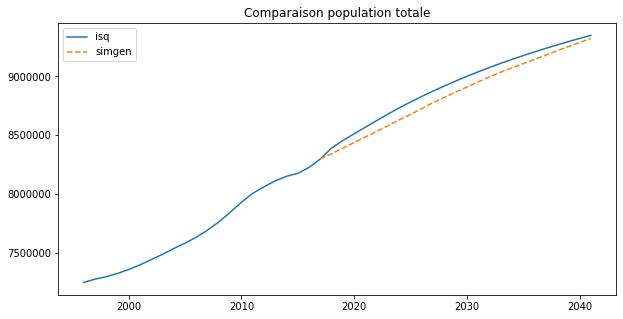

In [16]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total, label='isq')
plt.plot(pop, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population totale')
plt.show()

### Comparaison popuation par sexe

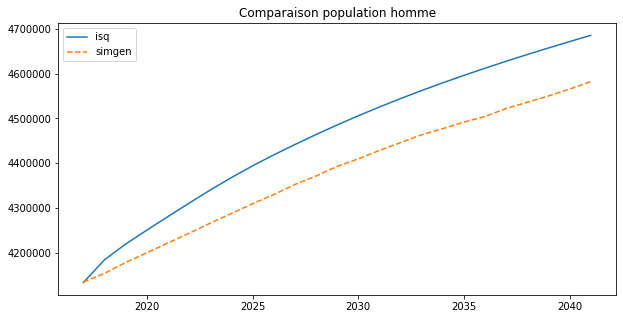

In [17]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total_m[pop_isq_total_m.index>=2017], label='isq')
plt.plot(pop_m, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population homme')
plt.show()

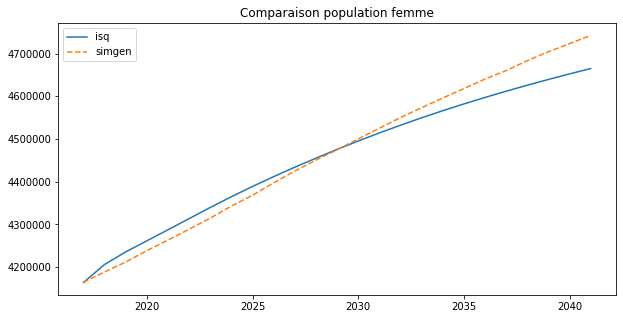

In [18]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total_f[pop_isq_total_m.index>=2017], label='isq')
plt.plot(pop_f, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population femme')
plt.show()

### Comparaison population par groupe d'âge

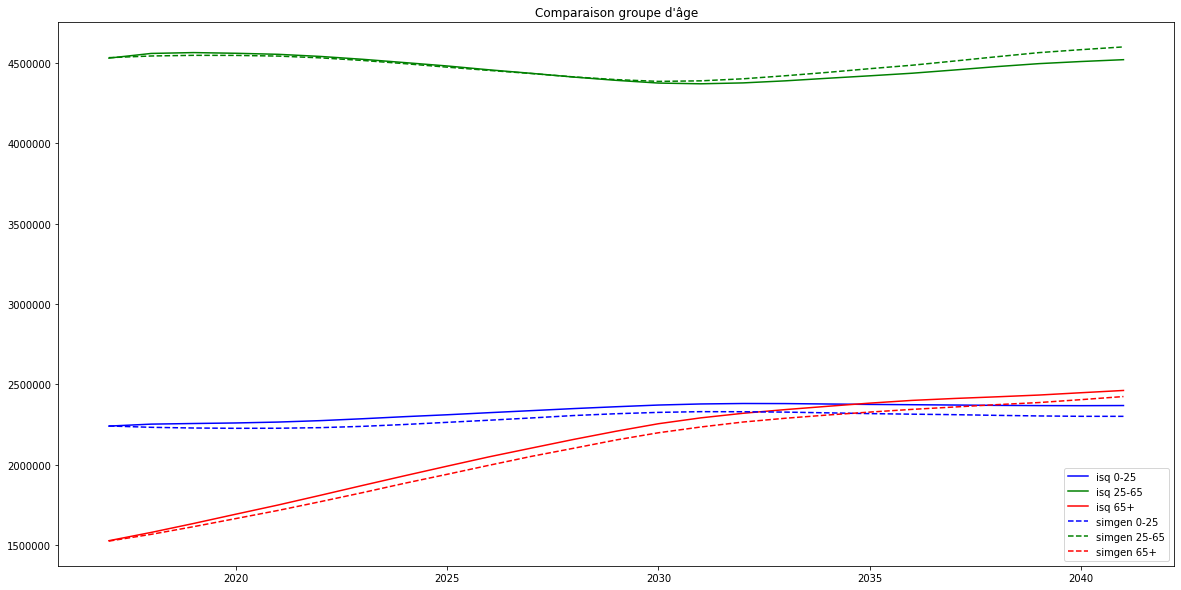

In [19]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr3_tot['[0, 25)'], label='isq 0-25', color='blue')
plt.plot(pop_isq_agegr3_tot['[25, 65)'], label='isq 25-65', color='green')
plt.plot(pop_isq_agegr3_tot['[65, 91)'], label='isq 65+', color='red')
plt.plot(pop_age_gr3['(-1, 24]'], label='simgen 0-25',color='blue', linestyle='dashed')
plt.plot(pop_age_gr3['(24, 64]'], label='simgen 25-65',color='green', linestyle='dashed')
plt.plot(pop_age_gr3['(64, 101]'], label='simgen 65+',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge")
plt.show()

### Comparaison groupe d'âge de 5 ans

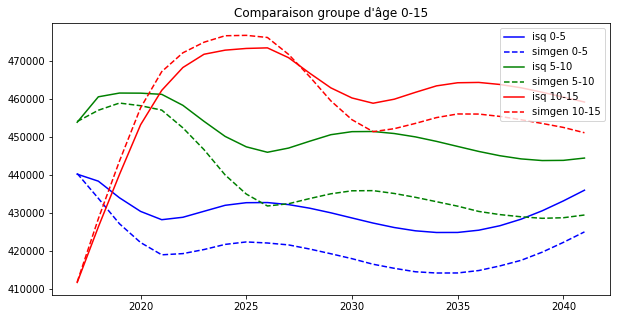

In [20]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_agegr_tot['[0, 5)'], label='isq 0-5', color='blue')
plt.plot(pop_age_gr['(-1, 4]'], label='simgen 0-5',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[5, 10)'], label='isq 5-10', color='green')
plt.plot(pop_age_gr['(4, 9]'], label='simgen 5-10',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[10, 15)'], label='isq 10-15', color='red')
plt.plot(pop_age_gr['(9, 14]'], label='simgen 10-15',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 0-15")
plt.show()

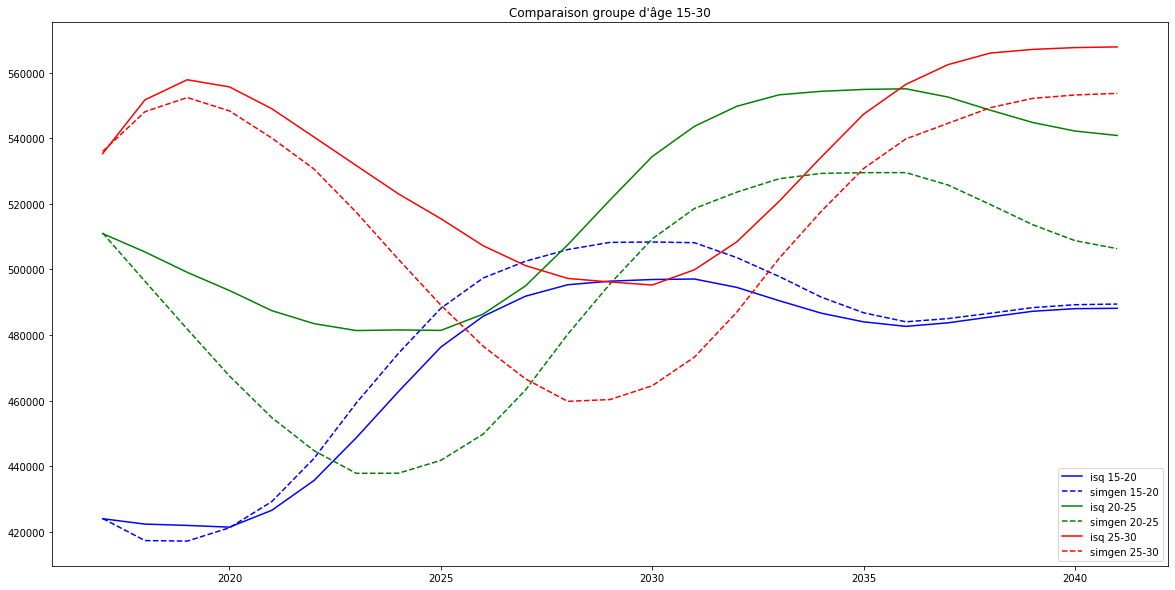

In [21]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[15, 20)'], label='isq 15-20', color='blue')
plt.plot(pop_age_gr['(14, 19]'], label='simgen 15-20',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[20, 25)'], label='isq 20-25', color='green')
plt.plot(pop_age_gr['(19, 24]'], label='simgen 20-25',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[25, 30)'], label='isq 25-30', color='red')
plt.plot(pop_age_gr['(24, 29]'], label='simgen 25-30',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 15-30")
plt.show()

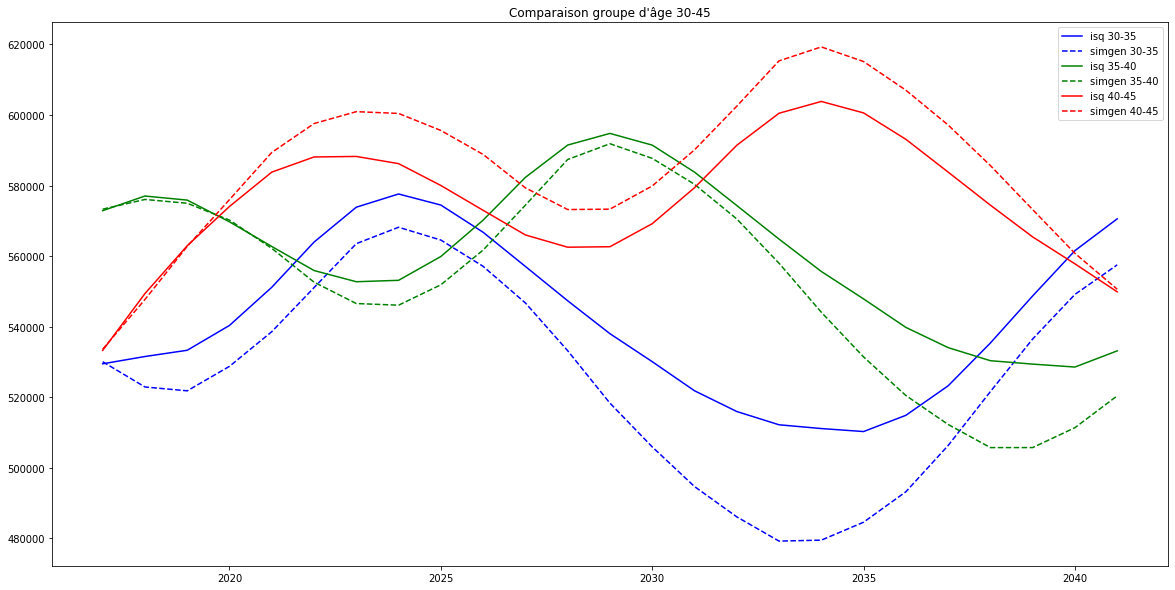

In [22]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[30, 35)'], label='isq 30-35', color='blue')
plt.plot(pop_age_gr['(29, 34]'], label='simgen 30-35',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[35, 40)'], label='isq 35-40', color='green')
plt.plot(pop_age_gr['(34, 39]'], label='simgen 35-40',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[40, 45)'], label='isq 40-45', color='red')
plt.plot(pop_age_gr['(39, 44]'], label='simgen 40-45',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 30-45")
plt.show()

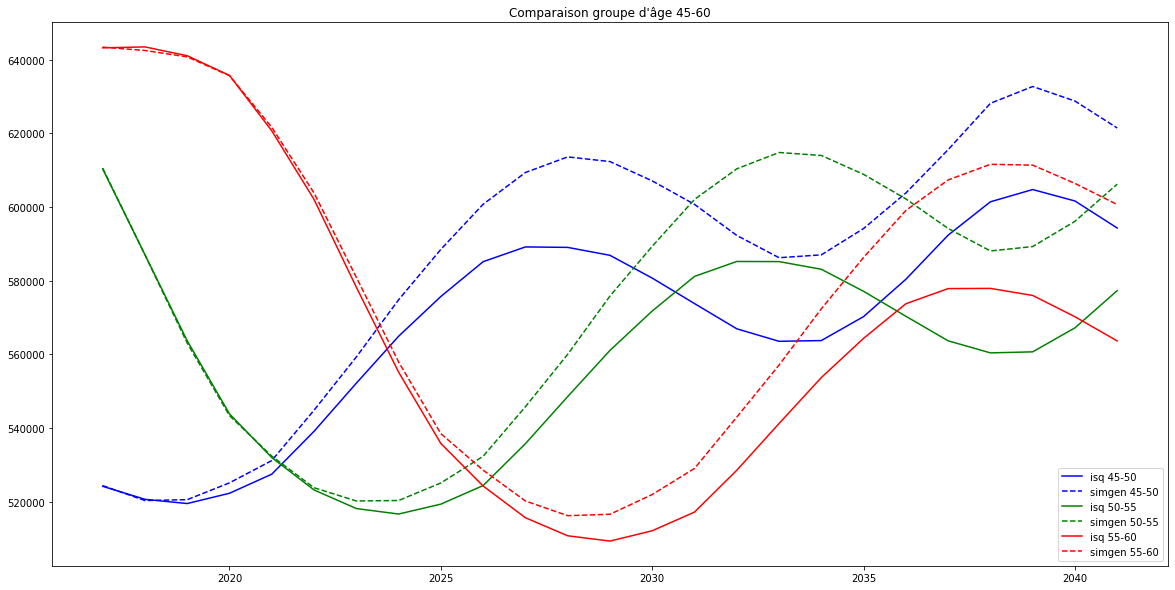

In [23]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[45, 50)'], label='isq 45-50', color='blue')
plt.plot(pop_age_gr['(44, 49]'], label='simgen 45-50',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[50, 55)'], label='isq 50-55', color='green')
plt.plot(pop_age_gr['(49, 54]'], label='simgen 50-55',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[55, 60)'], label='isq 55-60', color='red')
plt.plot(pop_age_gr['(54, 59]'], label='simgen 55-60',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 45-60")
plt.show()

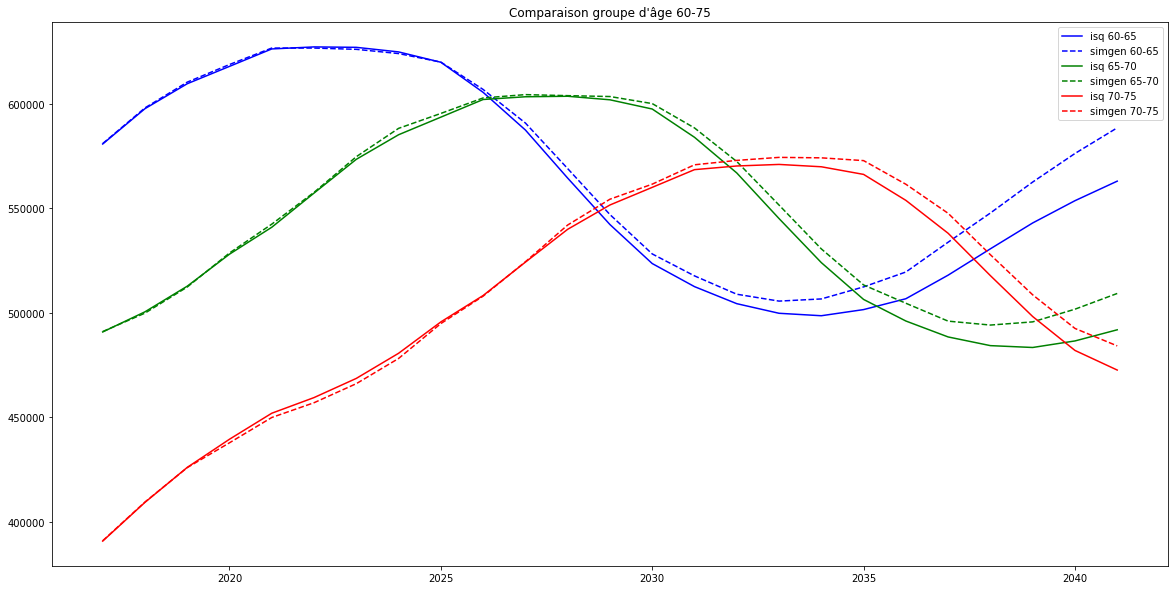

In [24]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[60, 65)'], label='isq 60-65', color='blue')
plt.plot(pop_age_gr['(59, 64]'], label='simgen 60-65',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[65, 70)'], label='isq 65-70', color='green')
plt.plot(pop_age_gr['(64, 69]'], label='simgen 65-70',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[70, 75)'], label='isq 70-75', color='red')
plt.plot(pop_age_gr['(69, 74]'], label='simgen 70-75',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 60-75")
plt.show()

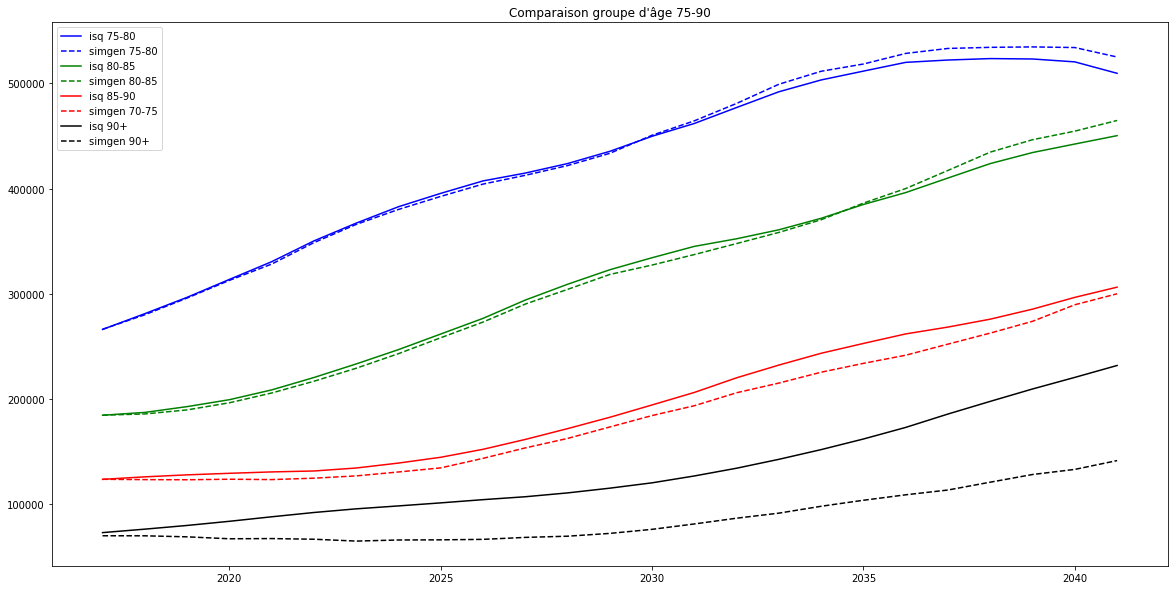

In [25]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[75, 80)'], label='isq 75-80', color='blue')
plt.plot(pop_age_gr['(74, 79]'], label='simgen 75-80',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[80, 85)'], label='isq 80-85', color='green')
plt.plot(pop_age_gr['(79, 84]'], label='simgen 80-85',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[85, 90)'], label='isq 85-90', color='red')
plt.plot(pop_age_gr['(84, 89]'], label='simgen 70-75',color='red', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[90, 95)'], label='isq 90+', color='black')
plt.plot(pop_age_gr['(89, 101]'], label='simgen 90+',color='black', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 75-90")
plt.show()

### Comparaison des naissances

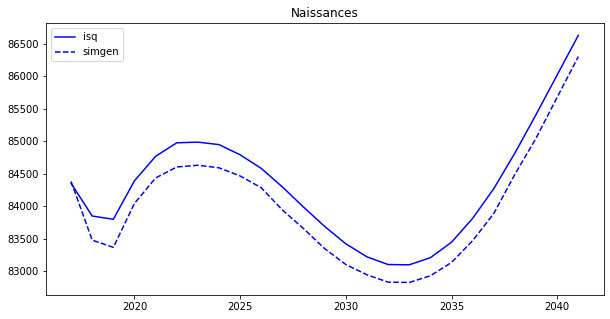

In [26]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_age_tot.loc[2017:,'0'], label='isq', color='blue')
plt.plot(pop_age[0], label='simgen',color='blue', linestyle='dashed')
plt.legend()
plt.title("Naissances")
plt.show()

# Éducation

## Extraction des données SimGen

Prenant en compte school_done

In [27]:
popeduc = base.stats.freq('educ')
propeduc15over = base.stats.prop('educ',sub='age>=15')
propeduc25overinsch = base.stats.prop('educ',sub='age>=25 and insch==False')
propeduc35overinsch = base.stats.prop('educ',sub='age>=35 and insch==False')
propeduc3544 = base.stats.prop('educ',sub='age>=35 and age<=44')
propeduc2564 = base.stats.prop('educ',sub='age>=25 and age<=64')
propeduc15overinsch = base.stats.prop('educ',sub='age>=15 and insch==False')
propeduc3544insch = base.stats.prop('educ',sub='age>=35 and age<=44 and insch==False')
propeduc2564insch = base.stats.prop('educ',sub='age>=25 and age<=64 and insch==False')

## Chargement des données isq

Source : Statistique Canada (SC), Enquête sur la population active (EPA), compilations de Statistique Canada et de l'Institut de la statistique du Québec réalisées grâce à l'accès aux données du Centre interuniversitaire québécois de statistiques sociales (CIQSS), membre du Réseau canadien des Centres de données de recherche (RCCDR). Adapté par l’Institut de la statistique du Québec (ISQ).

Mise à jour : 28 novembre 2019

https://www.stat.gouv.qc.ca/statistiques/education/niveau-scolarite/repartition-scol-ra-sexe-age.html#tri_tertr=50040000000000000&tri_sexe=1&tri_age=365&tri_stat=8403

In [28]:
pop_educ = pd.read_csv(path_data+'educ4_qc2.csv', sep=';')
pop_educ = pop_educ[pop_educ['year']>=2000]

Préparation des données par groupe d'âge

In [29]:
prop_educ_15over = pop_educ[pop_educ['age']=='15 ans et plus'] 
prop_educ_15over = prop_educ_15over[prop_educ_15over['sex']=='Total (hommes-femmes)']
prop_educ_15over = prop_educ_15over.set_index('year')
prop_educ_15over = prop_educ_15over.drop(columns=['age','sex','pop'])
prop_educ_3544 = pop_educ[pop_educ['age']=='35-44 ans'] 
prop_educ_3544 = prop_educ_3544[prop_educ_3544['sex']=='Total (hommes-femmes)']
prop_educ_3544 = prop_educ_3544.set_index('year')
prop_educ_3544 = prop_educ_3544.drop(columns=['age','sex','pop'])
prop_educ_2564 = pop_educ[pop_educ['age']=='25-64 ans'] 
prop_educ_2564 = prop_educ_2564[prop_educ_2564['sex']=='Total (hommes-femmes)']
prop_educ_2564 = prop_educ_2564.set_index('year')
prop_educ_2564 = prop_educ_2564.drop(columns=['age','sex','pop'])

Data Census 


In [30]:
census_educ = pd.read_csv(path_data+'census_educ.csv', sep=";")
census_educ.head()

,year,sex,educ4,age,pop,prop
0,2006,Total (hommes-femmes),uni,15 ans et plus,1015169,0.164761
1,2006,Total (hommes-femmes),dec,15 ans et plus,2010321,0.326273
2,2006,Total (hommes-femmes),none,15 ans et plus,1541716,0.250219
3,2006,Total (hommes-femmes),des,15 ans et plus,1594256,0.258746
4,2006,Total (hommes-femmes),none,25-64 ans,725237,0.171511


In [31]:
prop_educ_15over = census_educ[census_educ['age']=='15 ans et plus'] 
prop_educ_15over = prop_educ_15over[prop_educ_15over['sex']=='Total (hommes-femmes)']
prop_educ_15over = prop_educ_15over.set_index('year')
prop_educ_15over = prop_educ_15over.drop(columns=['age','sex','pop'])
prop_educ_3544 = census_educ[census_educ['age']=='35-44 ans'] 
prop_educ_3544 = prop_educ_3544[prop_educ_3544['sex']=='Total (hommes-femmes)']
prop_educ_3544 = prop_educ_3544.set_index('year')
prop_educ_3544 = prop_educ_3544.drop(columns=['age','sex','pop'])
prop_educ_2564 = census_educ[census_educ['age']=='25-64 ans'] 
prop_educ_2564 = prop_educ_2564[prop_educ_2564['sex']=='Total (hommes-femmes)']
prop_educ_2564 = prop_educ_2564.set_index('year')
prop_educ_2564 = prop_educ_2564.drop(columns=['age','sex','pop'])

Petite fonction pour graphiques d'éducation

In [32]:
def graph_educ(isq,simgen,title, save=False, save_path=None, save_name=None):
    plt.figure(figsize=(10,5))
    plt.plot(isq['prop'][isq['educ4']=='uni'],label='census uni', color='blue')
    plt.plot(simgen['uni'], label='simgen uni',color='blue', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='dec'],label='census dec', color='green')
    plt.plot(simgen['dec'], label='simgen dec',color='green', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='des'],label='census des', color='red')
    plt.plot(simgen['des'], label='simgen des',color='red', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='none'],label='census none', color='black')
    plt.plot(simgen['none'], label='simgen des',color='black', linestyle='dashed')
    plt.legend()
    plt.title(title)
    if save:
        #plt.savefig(save_path + save_name + '.jpg')
        plt.savefig(save_path + save_name + '.png')
    plt.show()

### Graphiques comparaison éducation

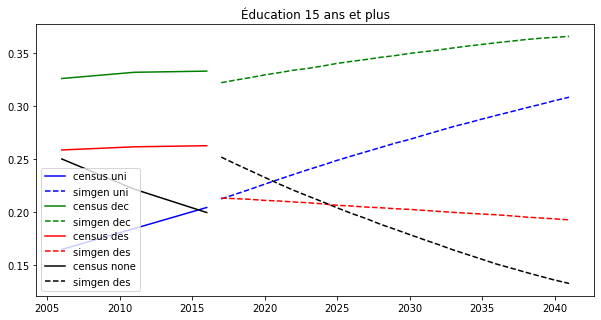

In [33]:
graph_educ(isq=prop_educ_15over,simgen=propeduc15overinsch,title='Éducation 15 ans et plus')

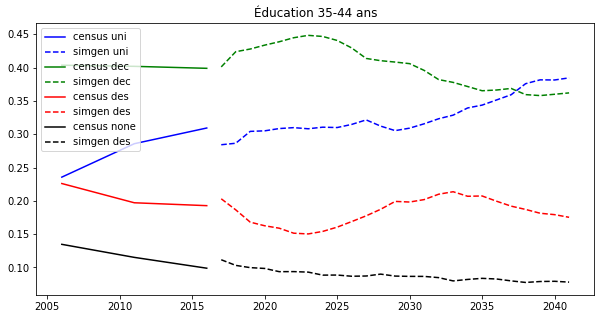

In [34]:
graph_educ(isq=prop_educ_3544, simgen=propeduc3544insch, title='Éducation 35-44 ans')

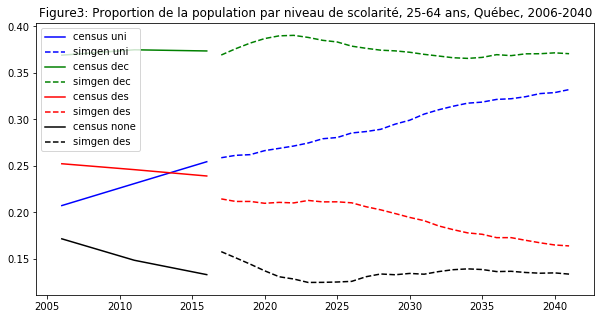

In [35]:
graph_educ(isq=prop_educ_2564,simgen=propeduc2564,
           title="Figure3: Proportion de la population par niveau de scolarité, 25-64 ans, Québec, 2006-2040",
          save=True, save_path="/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/",
          #save=True, save_path="/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/",
          save_name="educ_2564")

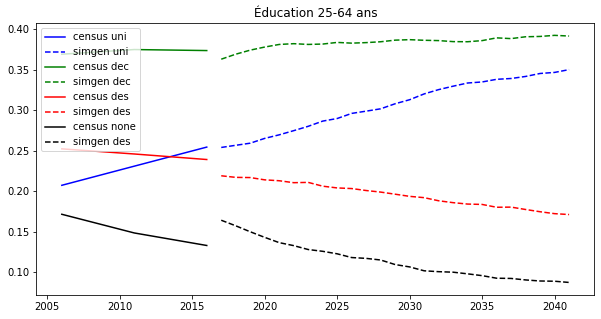

In [36]:
graph_educ(isq=prop_educ_2564,simgen=propeduc2564insch,title='Éducation 25-64 ans')

## Comparaison des personnes en couple



### Extraction données SimGen

Proportion des personnes en couple par groupe d'âge

In [37]:
popms = base.stats.freq('married')
propms15plus = base.stats.prop('married', sub="age>=15")
propms1544 = base.stats.prop('married', sub="age>=15 and age<=44")
propms4564 = base.stats.prop('married', sub="age>=45 and age<=64")
propms65plus = base.stats.prop('married', sub="age>=65")
propms15plus.columns= propms15plus.columns.astype('str')
propms1544.columns= propms1544.columns.astype('str')
propms4564.columns= propms4564.columns.astype('str')
propms65plus.columns= propms65plus.columns.astype('str')

### Extraction données Statistique Canada

Estimations de la population au 1er juillet, selon l'état matrimonial ou l'état matrimonial légal, l'âge et le sexe, Tableau : 17-10-0060-01

https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=1710006001

In [38]:
pop_ms = pd.read_csv(path_data+'married_qc.csv', sep=';')
pop_ms=pop_ms[pop_ms['married']==1]
pop_ms_15plus = pop_ms[pop_ms["age"]=="15 ans et plus"]
pop_ms_15plus = pop_ms_15plus.set_index(pop_ms_15plus["year"])
pop_ms_1544 = pop_ms[pop_ms["age"]=="15 à 44 ans"]
pop_ms_1544 = pop_ms_1544.set_index(pop_ms_1544["year"])
pop_ms_4564 = pop_ms[pop_ms["age"]=="45 à 64 ans"]
pop_ms_4564 = pop_ms_4564.set_index(pop_ms_4564["year"])
pop_ms_65plus = pop_ms[pop_ms["age"]=="65 ans et plus"]
pop_ms_65plus = pop_ms_65plus.set_index(pop_ms_65plus["year"])

Petite fonction pour graphiques de comparaison des unions

In [39]:
def graph_union(isq,simgen,title, save=False, save_path=None, save_name=None):
    plt.figure(figsize=(10,5))
    plt.plot(isq['prop'], label='isq couple',color='blue')
    plt.plot(1-isq['prop'],label="isq single",color='green')
    plt.plot(simgen["True"],label="simgen couple", color="blue", linestyle='dashed')
    plt.plot(1-simgen["True"], label='simgen single',color='green', linestyle='dashed')
    plt.legend()
    plt.title(title)
    if save:
        #plt.savefig(save_path + save_name + '.jpg')
        plt.savefig(save_path + save_name + '.png')

### Graphiques comparaioson des personnes en couple par groupe d'âge

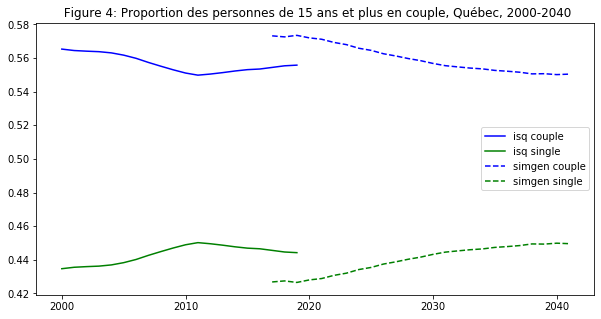

In [40]:
graph_union(pop_ms_15plus,propms15plus,title=" Figure 4: Proportion des personnes de 15 ans et plus en couple, Québec, 2000-2040", save=True,
            save_path="/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/", 
            #save_path="/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/",
            save_name="union_15over")

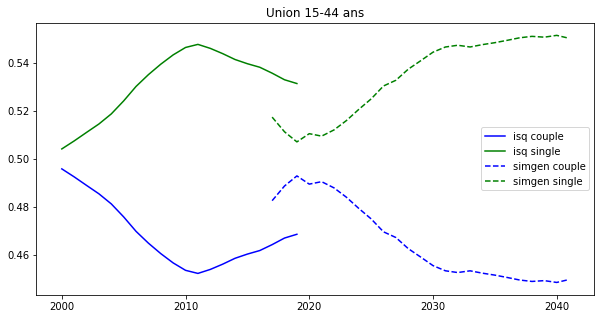

In [41]:
graph_union(pop_ms_1544,propms1544,title="Union 15-44 ans")

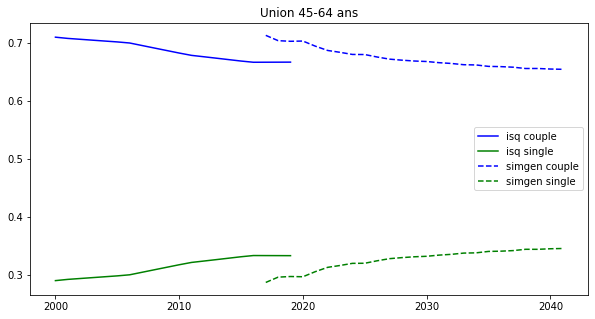

In [42]:
graph_union(pop_ms_4564,propms4564,title="Union 45-64 ans")

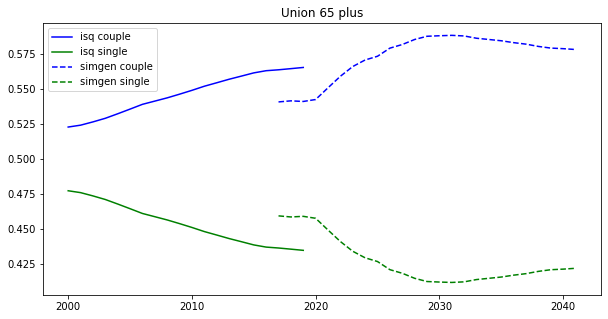

In [43]:
graph_union(pop_ms_65plus,propms65plus,title="Union 65 plus")

Comparaison education données de Statistiques Canada

In [44]:
pop_educ_stc = pd.read_csv(path_data+'educ4_qc_stc.csv', sep=';')
pop_educ_stc = pop_educ_stc[pop_educ_stc['year']>=2000]
pop_educ_stc

,year,sex,age,educ4,pop,prop
1080,2000,Femmes,15 ans et plus,dec,862600.0,0.287313
1081,2000,Femmes,15 ans et plus,des,731300.0,0.243580
1082,2000,Femmes,15 ans et plus,none,1001500.0,0.333578
1083,2000,Femmes,15 ans et plus,uni,406900.0,0.135529
1084,2000,Hommes,15 ans et plus,dec,862800.0,0.298961
...,...,...,...,...,...,...
3235,2019,Hommes,65 ans et plus,uni,158400.0,0.214054
3236,2019,Total (hommes-femmes),65 ans et plus,dec,442000.0,0.277047
3237,2019,Total (hommes-femmes),65 ans et plus,des,329600.0,0.206594
3238,2019,Total (hommes-femmes),65 ans et plus,none,543900.0,0.340918


In [45]:
prop_educ_stc_15over = pop_educ_stc[pop_educ_stc['age']=='15 ans et plus'] 
prop_educ_stc_15over = prop_educ_stc_15over[prop_educ_stc_15over['sex']=='Total (hommes-femmes)']
prop_educ_stc_15over = prop_educ_stc_15over.set_index('year')
prop_educ_stc_15over = prop_educ_stc_15over.drop(columns=['age','sex','pop'])
prop_educ_stc_25over = pop_educ_stc[pop_educ_stc['age']=='25 ans et plus'] 
prop_educ_stc_25over = prop_educ_stc_25over[prop_educ_stc_25over['sex']=='Total (hommes-femmes)']
prop_educ_stc_25over = prop_educ_stc_25over.set_index('year')
prop_educ_stc_25over = prop_educ_stc_25over.drop(columns=['age','sex','pop'])

prop_educ_stc_35over = pop_educ_stc[pop_educ_stc['age']=='25 ans et plus'] 
prop_educ_stc_35over = prop_educ_stc_35over[prop_educ_stc_35over['sex']=='Total (hommes-femmes)']
prop_educ_stc_35over = prop_educ_stc_35over.set_index('year')
prop_educ_stc_35over = prop_educ_stc_35over.drop(columns=['age','sex','pop'])

prop_educ_stc_3544 = pop_educ_stc[pop_educ_stc['age']=='35-44 ans'] 
prop_educ_stc_3544 = prop_educ_stc_3544[prop_educ_stc_3544['sex']=='Total (hommes-femmes)']
prop_educ_stc_3544 = prop_educ_stc_3544.set_index('year')
prop_educ_stc_3544 = prop_educ_stc_3544.drop(columns=['age','sex','pop'])
prop_educ_stc_2564 = pop_educ_stc[pop_educ_stc['age']=='25-64 ans'] 
prop_educ_stc_2564 = prop_educ_stc_2564[prop_educ_stc_2564['sex']=='Total (hommes-femmes)']
prop_educ_stc_2564 = prop_educ_stc_2564.set_index('year')
prop_educ_stc_2564 = prop_educ_stc_2564.drop(columns=['age','sex','pop'])

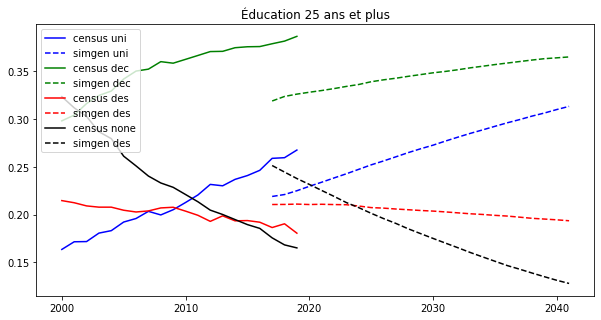

In [46]:
graph_educ(isq=prop_educ_stc_25over,simgen=propeduc25overinsch,title='Éducation 25 ans et plus')

In [47]:
prop_educ_stc_35over

,educ4,prop
year,,
2000,dec,0.298150
2000,des,0.214721
2000,none,0.323485
2000,uni,0.163644
2001,dec,0.304138
...,...,...
2018,uni,0.259603
2019,dec,0.386523
2019,des,0.180640


In [48]:
prop_educ_15over

,educ4,prop
year,,
2006,uni,0.164761
2006,dec,0.326273
2006,none,0.250219
2006,des,0.258746
2011,none,0.221684
2011,dec,0.332138
2011,des,0.261719
2011,uni,0.184459
2016,none,0.199619


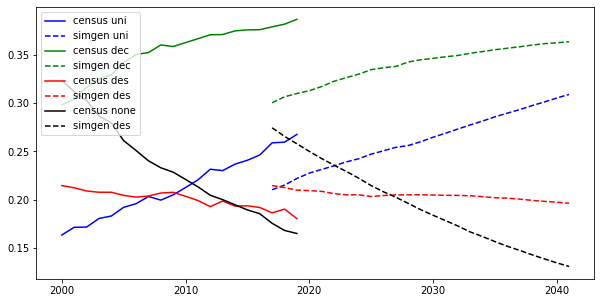

In [49]:
graph_educ(isq=prop_educ_stc_35over, simgen=propeduc35overinsch, title="")

## Graphique Étudiants

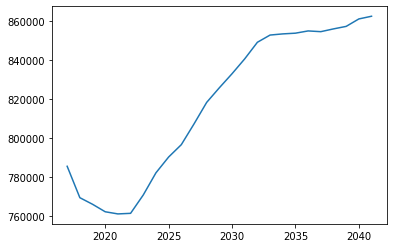

In [50]:
base.stats.freq("age", sub='insch==True and age>=17 and age<=35').T.sum().plot()

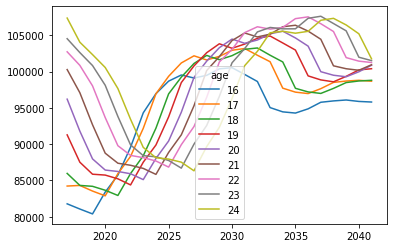

In [51]:
base.stats.freq("age", sub='age>=16 and age <25').plot()

## Famille

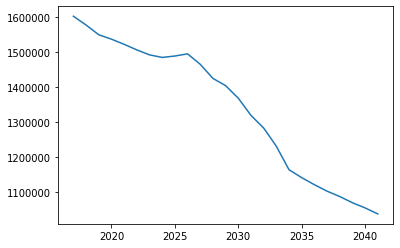

In [52]:
base.stats.freq("nkids", sub="nkids>0").T.sum().plot()

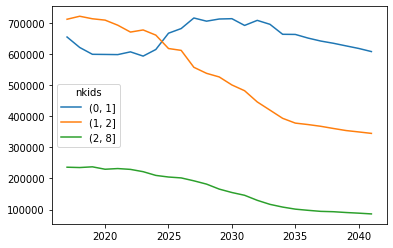

In [53]:
kids_count = [0,1,2,8]
base.stats.freq("nkids", bins=kids_count).plot()

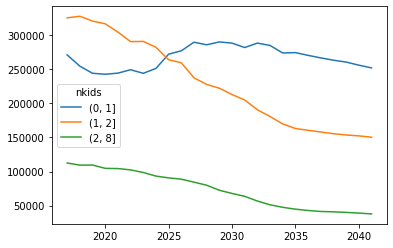

In [54]:
nkids_couple=base.stats.freq("nkids", bins=kids_count, sub="married==True")
nkids_couple=nkids_couple/2
nkids_couple.plot()

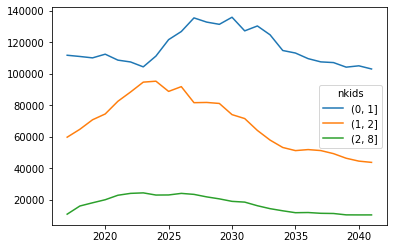

In [55]:
nkids_single=base.stats.freq("nkids", bins=kids_count, sub="married==False")
nkids_single.plot()

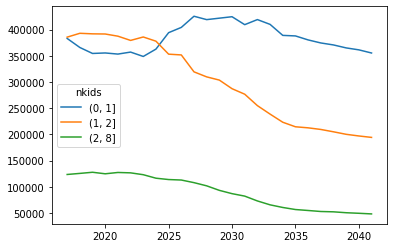

In [56]:
nkids= nkids_couple+nkids_single
nkids.plot()

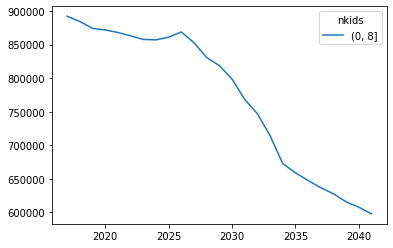

In [57]:
bk = [0, 8]
kids_couple=base.stats.freq("nkids", bins=bk, sub="married==True")
kids_couple=kids_couple/2
kids_single=base.stats.freq("nkids", bins=bk, sub="married==False")
kids = kids_single+kids_couple
kids.plot()

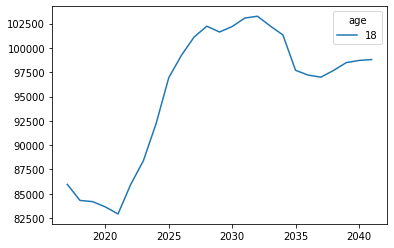

In [58]:
base.stats.freq('age', sub="age==18").plot()

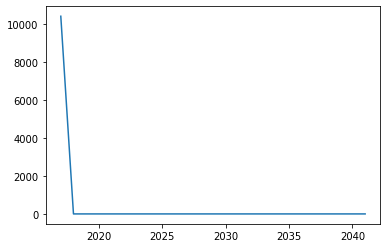

In [59]:
base.stats.freq("age", sub="insch==True and age>34").T.sum().plot()

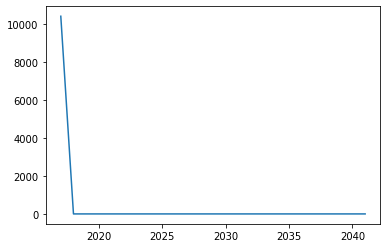

In [60]:
base.stats.freq("age", sub="insch==True and age>=35 and age<=65").T.sum().plot()

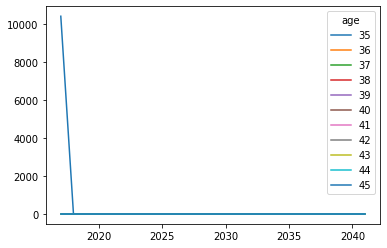

In [61]:
base.stats.freq("age", sub="insch==True and age>=35 and age<=45").plot()